In [43]:
# path = '/content/drive/My Drive/datasets/50_Startups.csv'
path = '50_Startups.csv'

In [44]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
# Importing the dataset
dataset = pd.read_csv(path)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<AxesSubplot:>

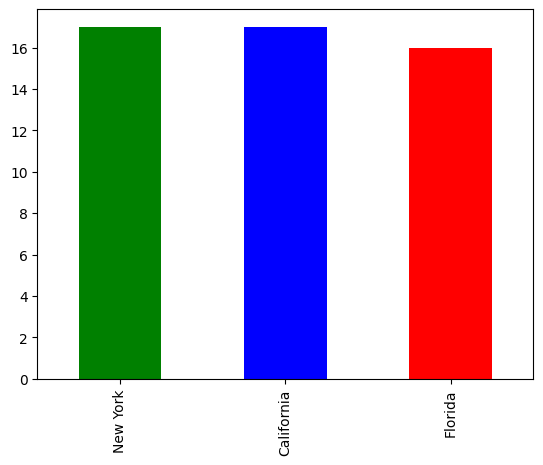

In [46]:
dataset['State'].value_counts().plot.bar(color=['green', 'blue', 'red'])

In [47]:
#Convert the column into categorical columns

states=pd.get_dummies(X['State'],drop_first=True)
states.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [48]:
# Drop the state coulmn
X=X.drop('State',axis=1)

In [49]:
# concat the dummy variables
X=pd.concat([X,states],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [50]:
for column in X.columns[:-2]:
    X[column] /= X[column].max()
# print(X.columns[:-2])
X.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,1.000000,0.749527,1.000000,0,1
1,0.983359,0.828805,0.940893,0,0
2,0.927985,0.553781,0.864664,1,0
3,0.873136,0.649738,0.812235,0,1
4,0.859438,0.500378,0.776136,1,0


In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [53]:
b = regressor.intercept_
slopes = regressor.coef_
print(f"Intrercep : {b}")
print(f"Slope : {slopes}")

Intrercep : 42554.167617732426
Slope : [127892.18154461   6006.22573238  17272.02810316   -959.28416006
    699.36905252]


In [54]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

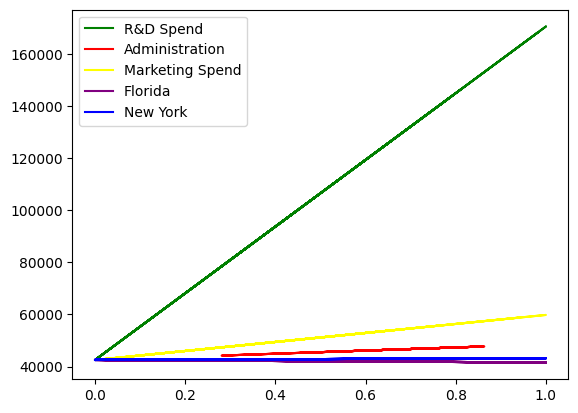

In [55]:
colors = ['green', 'red', 'yellow', 'purple', 'blue']
i = 0
for column in X_train.columns:
    c = X_train[column]
    y = [x * slopes[i] + b for x in c]
    plt.plot(c, y, color=colors[i], label=column)
    i += 1
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [57]:
score

0.9347068473282423